# **Important Imports and Uploading Dataset**

In [1]:
# -*- coding: utf-8 -*-
"""intrusion detection system
Automatically generated by Colaboratory.
Original file is located at
    https://colab.research.google.com/drive/1kyt50JZi3xZa8yRFvHBtmNPxHqaBSsHn
"""

#n -import important packages (this might change as we move forward with the project)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

#N - updated: libraries for Evaluate and measure the accuracy of the model
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

#n -libraries for the files in google drive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from google.colab import drive
drive.mount('/content/drive')

#load dataset
df = pd.read_csv('/content/drive/MyDrive/kddcup99_csv.csv')
df.columns
df.info() #n

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494

# **Preprocessing**

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

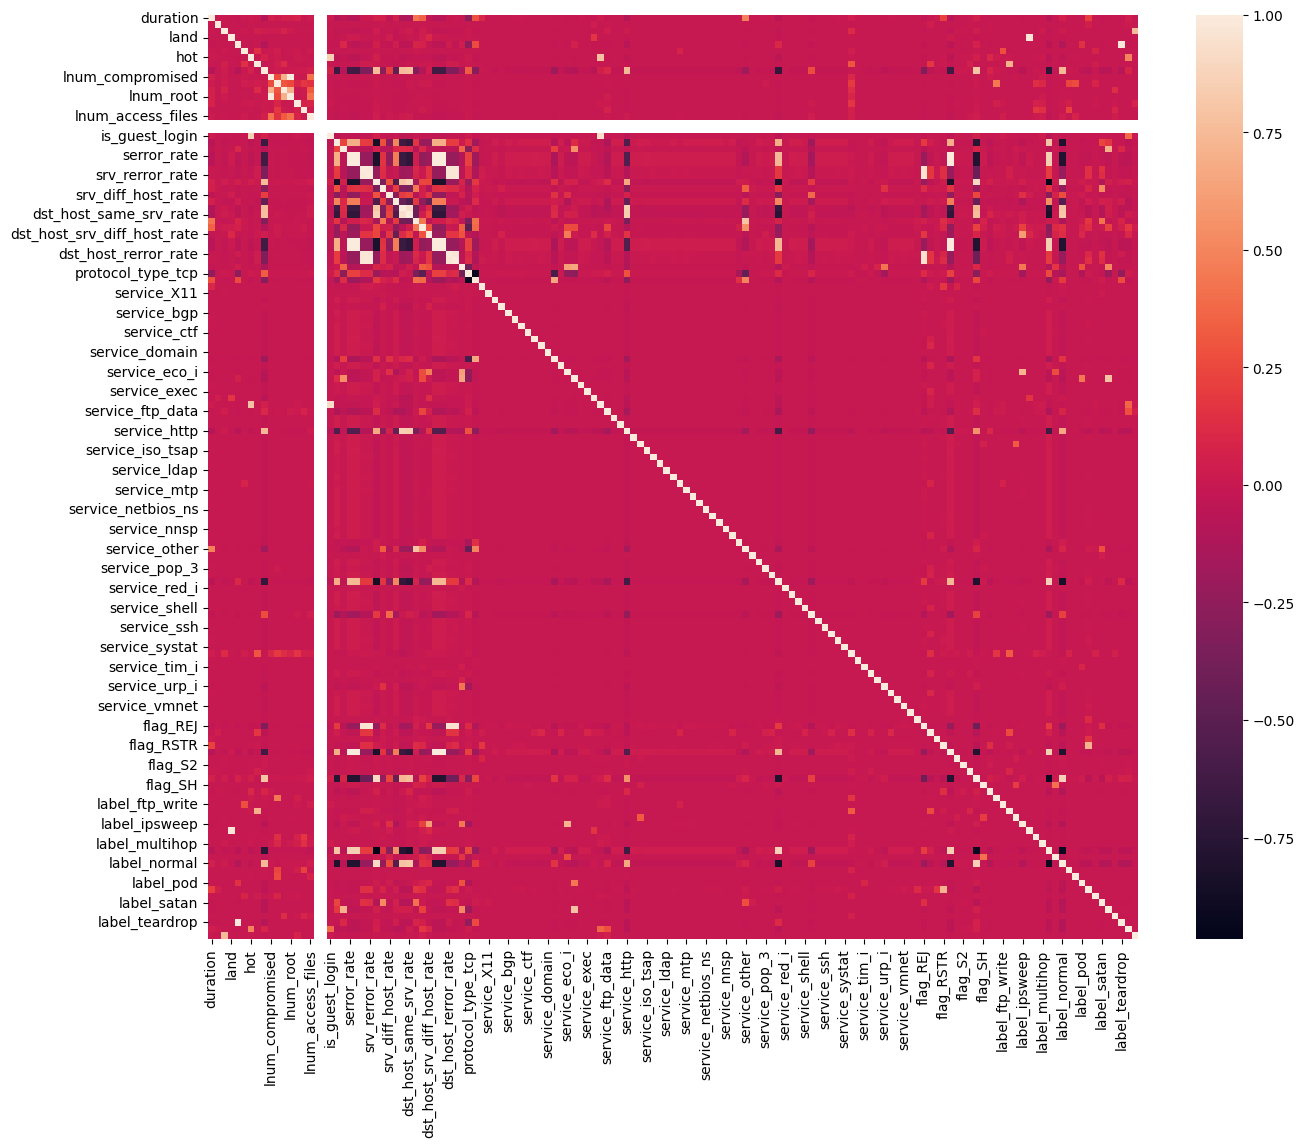

In [2]:
#n -check for any missing values
print(df.isnull().sum())
duplicates = df.duplicated()
print('Number of duplicate entries:', duplicates.sum())

#Remove duplicate rows
df = df.drop_duplicates()
print('Number of duplicate entries after removing:', df.duplicated().sum())
df.label.value_counts()

#AlAnoud AlJebreen -Convert categorical data into numerical data
df = pd.get_dummies(df, columns=['protocol_type', 'service', 'flag', 'label'])

#NS - Normalization of dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df.drop('label_normal', axis=1))
df_normalized = pd.DataFrame(df_normalized, columns=df.drop('label_normal', axis=1).columns)
df_normalized = pd.concat([df_normalized, df['label_normal']], axis=1)

df.to_csv('newkddcup99.csv', index=False)

#NS
corr = df.corr()
  
plt.figure(figsize =(15, 12))
  
sns.heatmap(corr)
  
plt.show()

In [3]:


#df.drop('lnum_access_files', axis = 1, inplace = True)
df.drop('is_guest_login', axis = 1, inplace = True)
#NS - This variable is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('srv_rerror_rate', axis = 1, inplace = True)
#NS - This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
df.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)
#NS - This variable is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_serror_rate', axis = 1, inplace = True)
#NS - This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
df.drop('dst_host_rerror_rate', axis = 1, inplace = True)
#NS - This variable is highly correlated with rerror_rate and should be ignored for analysis.
df.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)
#NS - This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
df.drop('dst_host_same_srv_rate', axis = 1, inplace = True)
df 


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,label_phf,label_pod,label_portsweep,label_rootkit,label_satan,label_smurf,label_spy,label_teardrop,label_warezclient,label_warezmaster
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
494016,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
494017,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
494018,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# **Feature Selection**

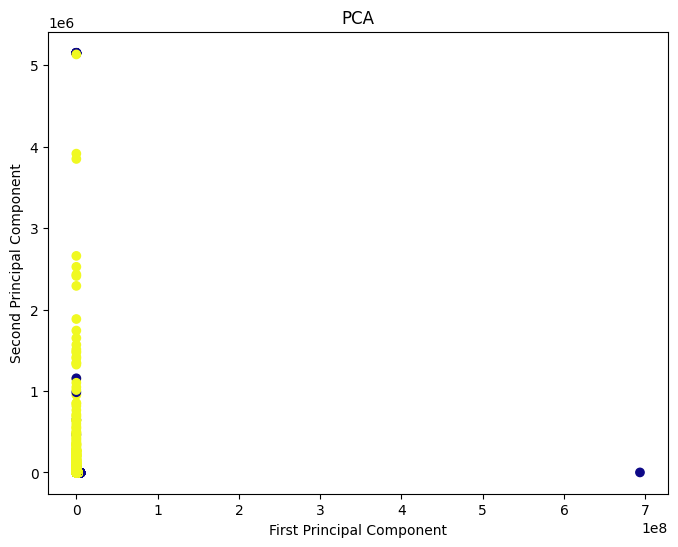

<Figure size 800x600 with 0 Axes>

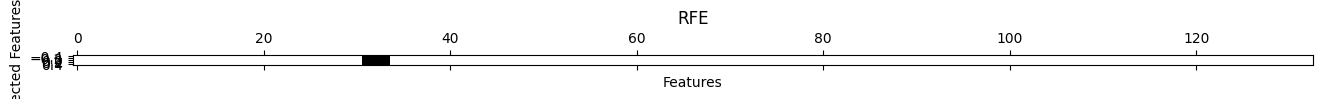

In [5]:
#AlAnoud AlJebreen -Feature Selection PCA
from sklearn.decomposition import PCA
x = df.drop('label_normal', axis=1)
y = df['label_normal']
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)

#PCA plot
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA')
plt.show()

#AlAnoud AlJebreen -Feature Selection RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
x = df.drop('label_normal', axis=1)
y = df['label_normal']
model = LinearRegression()
rfe = RFE(model, n_features_to_select=3)
rfe.fit(x,y) 

#RFE plot
plt.figure(figsize=(8,6))
mask = rfe.support_
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Features')
plt.ylabel('Selected Features')
plt.title('RFE')
plt.show()

# **Training and Testing Set Split**

In [7]:
#SK - Split the dataset into training and testing sets (40% for test data and 60% for train data)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=42)
#print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape) #print the shapes of the training and test sets 

#SK - Save the training and testing datasets into separate CSV files
X_train.to_csv('train_data.csv', index=False)
X_test.to_csv('test_data.csv', index=False)
Y_train.to_csv('train_labels.csv', index=False)
Y_test.to_csv('test_labels.csv', index=False)

(87351, 133) (58234, 133) (87351,) (58234,)


# **Decision Tree Classifier**


In [9]:
#SK - First Model: Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

#SK - Train the model using the training data
start = time.time()
dtc.fit(X_train, Y_train)
print("Processing time for Training using Decision Tree Classifier: %s seconds " % (time.time() - start))

#SK - Make predictions on the test data
start = time.time()
Y_pred = dtc.predict(X_test)
print("Processing time for Testing using Decision Tree Classifier: %s seconds " % (time.time() - start)) 

#NS - Perform cross-validation and get the mean accuracy score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc, X_train, Y_train, cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

#SK - Calculate the accuracy, recall, precision.
#NS -  Updated - calculate f1-score, confusion matrix
accuracy = accuracy_score(Y_test, Y_pred)
recall= recall_score(Y_test, Y_pred )
precision= precision_score(Y_test, Y_pred )
f1score = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

#SK - Print the results
#NS - Updated the decimal required for better comparison
print("Decision Tree Classifier:")
print("The accuracy of the model is : {:.4f}%".format(accuracy*100))
print("Recall = {:.4f} " .format(recall*100))
print("Precison = {:.4f} ".format(precision*100))
print("F1-score: ", f1score)
print("Confusion Matrix:\n", conf_matrix)


Processing time for Training using Decision Tree Classifier: 3.3307273387908936 seconds 
Processing time for Testing using Decision Tree Classifier: 0.09370994567871094 seconds 
Cross-validation scores: [1.         0.99988552 1.         0.99965655 0.99977104 0.99988552
 0.99988552 1.         0.99988552 0.99919863]
Mean cross-validation score: 0.9998168288494561
Decision Tree Classifier:
The accuracy of the model is : 99.9742%
Recall = 99.9659 
Precison = 99.9915 
F1-score:  0.9997866439086837
Confusion Matrix:
 [[23074     3]
 [   12 35145]]


# **Random Forest Classifier**

In [10]:
#NS - Second Model: Random Forest
from sklearn.ensemble import RandomForestClassifier

#NS - Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

#NS - Train the model using the training data
start = time.time()
rfc.fit(X_train, Y_train)
print("Processing time for Training using Random Forest Classifier: %s seconds " % (time.time() - start))

#NS - Make predictions on the test data
start = time.time()
Y_pred = rfc.predict(X_test)
print("Processing time for Testing using Random Forest Classifier: %s seconds " % (time.time() - start))

#NS - Perform cross-validation and get the mean accuracy score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc, X_train, Y_train, cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

#NS - Calculate the accuracy, f1-score,recall, precision and confusion matrix
accuracy = accuracy_score(Y_test, Y_pred)
recall= recall_score(Y_test, Y_pred )
precision= precision_score(Y_test, Y_pred )
f1score = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

#NS - Print the results
print("Random Forest Classifier:")
print("The accuracy of the model is : {:.4f}%".format(accuracy*100))
print("Recall = {:.4f} " .format(recall*100))
print("Precison = {:.4f} ".format(precision*100))
print("F1-score: ", f1score)
print("Confusion Matrix:\n", conf_matrix)

Processing time for Training using Random Forest Classifier: 8.360581159591675 seconds 
Processing time for Testing using Random Forest Classifier: 0.7756664752960205 seconds 
Cross-validation scores: [1.         0.99988552 1.         0.99965655 0.99965655 0.99977104
 0.99988552 1.         0.99988552 0.99919863]
Mean cross-validation score: 0.9997939324556382
Random Forest Classifier:
The accuracy of the model is : 99.9828%
Recall = 99.9943 
Precison = 99.9772 
F1-score:  0.9998577929465302
Confusion Matrix:
 [[23069     8]
 [    2 35155]]


# **Gaussian Naive Bayes Classifier**

In [ ]:
#NS Third Model - Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gbc = GaussianNB()

#NS - Train the model using the training data
start = time.time()
gbc.fit(X_train, Y_train)
print("Processing time for Training using Gaussian Naive Bayes Classifier: %s seconds " % (time.time() - start))

#NS - Make predictions on the test data
start = time.time()
Y_pred_gbc = gbc.predict(X_test)
print("Processing time for Testing using Gaussian Naive Bayes Classifier: %s seconds " % (time.time() - start))

#NS - Perform cross-validation and get the mean accuracy score
scores = cross_val_score(dtc, X_train, Y_train, cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

#NS - Calculate the accuracy, f1-score,recall, precision and confusion matrix
accuracy = accuracy_score(Y_test, Y_pred_gbc)
recall= recall_score(Y_test, Y_pred_gbc )
precision= precision_score(Y_test, Y_pred_gbc )
f1score = f1_score(Y_test, Y_pred_gbc)
conf_matrix = confusion_matrix(Y_test, Y_pred_gbc)

#NS - Print the results
print("Gaussian Naive Bayes Classifier:")
print("The accuracy of the model is : {:.4f}%".format(accuracy*100))
print("Recall = {:.4f} " .format(recall*100))
print("Precison = {:.4f} ".format(precision*100))
print("F1-score: ", f1score)
print("Confusion Matrix:\n", conf_matrix)

# **XGBoost Classifier**

In [ ]:
#NS Fourth Model - XGBoost Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()

#NS - Train the model using the training data
start = time.time()
xgb.fit(X_train, Y_train)
print("Processing time for Training using XGBoost Classifier: %s seconds " % (time.time() - start))

#NS - Make predictions on the test data
start = time.time()
Y_pred_xgb = xgb.predict(X_test)
print("Processing time for Testing using XGBoost Classifier: %s seconds " % (time.time() - start))

#NS - Perform cross-validation and get the mean accuracy score
scores = cross_val_score(dtc, X_train, Y_train, cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

#NS - Calculate the accuracy, f1-score,recall and precision
accuracy = accuracy_score(Y_test, Y_pred_xgb)
recall= recall_score(Y_test, Y_pred_xgb )
precision= precision_score(Y_test, Y_pred_xgb )
f1score = f1_score(Y_test, Y_pred_xgb)
conf_matrix = confusion_matrix(Y_test, Y_pred_xgb)

#NS - Print the results
print("XG Boost Classifier:")
print("The accuracy of the model is : {:.4f}%".format(accuracy*100))
print("Recall = {:.4f} " .format(recall*100))
print("Precison = {:.4f} ".format(precision*100))
print("F1-score: ", f1score)
print("Confusion Matrix:\n", conf_matrix)

# **Visualization of result metrics**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#NS - Define metrics for all models
metrics = {
    'Decision Tree': [0.7656, 0.6203, 1.00, 0.6304],
    'Random Forest': [0.9998, 0.9997, 0.9999, 0.9998],
    'Gaussian Naive Bayes': [0.8277, 0.7071, 0.9980, 0.7492],
    'XGBoost': [0.9997, 0.9997, 0.9997, 0.9997]
}

#NS - Create a bar plot 
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
opacity = 0.8
index = np.arange(len(metrics))

rects1 = ax.bar(index, metrics['Decision Tree'], bar_width, alpha=opacity, color='b', label='Decision Tree')
rects2 = ax.bar(index + bar_width, metrics['Random Forest'], bar_width, alpha=opacity, color='g', label='Random Forest')
rects3 = ax.bar(index + 2*bar_width, metrics['Gaussian Naive Bayes'], bar_width, alpha=opacity, color='r', label='Gaussian Naive Bayes')
rects4 = ax.bar(index + 3*bar_width, metrics['XGBoost'], bar_width, alpha=opacity, color='c', label='XGBoost')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of ML Models')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('F1-score', 'Precision', 'Recall', 'Accuracy'))
ax.legend()

plt.tight_layout()
plt.show()